In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#Read CSV file containing Reuters data
#data_path = "drive/My Drive/Extracted_Reuters_Data/"
data_path = ""

df_X = pd.read_csv(data_path+"project_features_df_2.csv", index_col=[0])
df_Y = pd.read_csv(data_path+"project_labels_df_2.csv", index_col=[0])

In [4]:
df_X

,aaa,aamodt,abacha,abandon,abare,abb,abbey,abc,abdul,abdullah,...,zemin,zeneca,zero,zimbabwe,zinc,zloty,zlotys,zone,zurich,clusterId
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062681,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
51249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
51250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
51251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [5]:
df_Y

,C11,C12,C13,C15,C151,C1511,C152,C17,C171,C172,...,M12,M13,M131,M132,M14,M141,M142,M143,MCAT,clusterId
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
51249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
51250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
51251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


# Step 2: Cluster Classifiers

In [6]:
!pip install scikit-multilearn

from skmultilearn.problem_transform import LabelPowerset
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss 

import warnings
warnings.filterwarnings('ignore')

#Determined in Step 2 in prior file.
CLUSTER_COUNT = 7

In [7]:
MLP_TRAIN_RATIO = 0.8

#Generate classifier for each cluster id
for i in range(0, CLUSTER_COUNT):
  
  df_X_temp = df_X.loc[ df_X['clusterId'] == i ]
  df_Y_temp = df_Y.loc[ df_Y['clusterId'] == i ]
  print(f"Feature Shape: {df_X_temp.shape[0]}")
  print(f"Label Shape:   {df_Y_temp.shape[0]}")

  train_range = round( MLP_TRAIN_RATIO * df_X_temp.shape[0] )
  print(f"Train range: {train_range}")
  
  x_train = df_X_temp.iloc[:train_range,0:-1].values
  y_train = df_Y_temp.iloc[:train_range,0:-1].values
  print(f"X_Train: {x_train.shape}  Y_Train: {y_train.shape}")

  x_test = df_X_temp.iloc[train_range:,0:-1].values
  y_test = df_Y_temp.iloc[train_range:,0:-1].values
  print(f"X_Test:  {x_test.shape}   Y_Test:  {y_test.shape}")

  #MLP Hyperparameter Tuning
  hidden_layers = 1024 #500
 
  clf_mlp = LabelPowerset( MLPClassifier(activation='relu',
                                         #early_stopping = false, 
                                         #learning_rate = 'constant', 
                                         solver = 'adam',   
                                         #alpha = 0.006, 
                                         max_iter = 300, #epochs
                                         hidden_layer_sizes = hidden_layers))
  clf_mlp.fit(x_train, y_train)
  mlp_pred = clf_mlp.predict(x_test)

  print("f1_score:     ", f1_score(y_test, mlp_pred, average='macro'))
  print("Accuracy:     ", accuracy_score(y_test, mlp_pred))
  print("Hamming Loss: ", hamming_loss(y_test, mlp_pred))
  print("\n")

Feature Shape: 3276
Label Shape:   3276
Train range: 2621
X_Train: (2621, 7000)  Y_Train: (2621, 47)
X_Test:  (655, 7000)   Y_Test:  (655, 47)
f1_score:      0.1276595744680851
Accuracy:      1.0
Hamming Loss:  0.0


Feature Shape: 2938
Label Shape:   2938
Train range: 2350
X_Train: (2350, 7000)  Y_Train: (2350, 47)
X_Test:  (588, 7000)   Y_Test:  (588, 47)
f1_score:      0.4242230994826744
Accuracy:      0.7704081632653061
Hamming Loss:  0.01599363149515125


Feature Shape: 3967
Label Shape:   3967
Train range: 3174
X_Train: (3174, 7000)  Y_Train: (3174, 47)
X_Test:  (793, 7000)   Y_Test:  (793, 47)
f1_score:      0.46925918064735705
Accuracy:      0.5132408575031526
Hamming Loss:  0.033430817525690215


Feature Shape: 4546
Label Shape:   4546
Train range: 3637
X_Train: (3637, 7000)  Y_Train: (3637, 47)
X_Test:  (909, 7000)   Y_Test:  (909, 47)
f1_score:      0.19218701252638812
Accuracy:      0.8140814081408141
Hamming Loss:  0.0088008800880088


Feature Shape: 12749
Label Shape:   1

# Step 4: Enhanced Feature Selection

Autoencoder

In [8]:
from keras import models, layers, optimizers, datasets, utils

TRAIN_RATIO = 0.8
#CLUSTER_COUNT = 7
extracted_features = []

for i in range(0, CLUSTER_COUNT):
    
    df_X_temp = df_X.loc[ df_X['clusterId'] == i ]
    train_range = round( TRAIN_RATIO * df_X_temp.shape[0] )
    
    #Train, Test and All dataset
    x_all = df_X_temp.iloc[:, 0:-1].values
    x_train = df_X_temp.iloc[:train_range,0:-1].values
    x_test = df_X_temp.iloc[train_range:,0:-1].values
    print(f"X_Train: {x_train.shape}  X_Test: {x_test.shape}")
    
    input_nodes = df_X_temp.shape[1] - 1
    print(input_nodes)
    
    #Autoencoder Layers
    inputs = layers.Input(shape=(input_nodes,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    b = layers.Dense(32, activation='relu')(x) #bottleneck layer
    x = layers.Dense(64, activation='relu')(b)
    x = layers.Dense(128, activation='relu')(x)
    outputs= layers.Dense(input_nodes, activation='softmax')(x)

    #Models
    autoencoder = models.Model(inputs=inputs, outputs=outputs)
    encoder = models.Model(inputs=inputs, outputs=b)

    autoencoder.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

    history = autoencoder.fit(x_train, x_train,
                        verbose = 1, 
                        batch_size=250,
                        epochs=10,
                        shuffle=True,
                        validation_data=(x_test, x_test))

    #Encode Features
    x_encoded = encoder.predict(x_all)
    print(x_encoded.shape)
    
    #Store features whith dimension reduction
    extracted_features.append( pd.DataFrame(x_encoded) )
    
    #debug
    #if(i == 0):
      #break

Using TensorFlow backend.


X_Train: (2621, 7000)  X_Test: (655, 7000)
7000





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2621 samples, validate on 655 samples
Epoch 1/10
2621/2621 [==============================] - 5s 2ms/step - loss: 0.0043 - acc: 0.9950 - val_loss: 0.0043 - val_acc: 0.9950
Epoch 2/10
2621/2621 [==============================] - 3s 1ms/step - loss: 0.0043 - acc: 0.9950 - val_loss: 0.0043 - val_acc: 0.9950
Epoch 3/10
2621/2621 [==============================] - 3s 1ms/step - loss: 0.0043 - acc: 0.9950 - val_loss: 0.0042 - val_acc: 0.9950
Epoch 4/10
2621/2621 [==============================] - 3s 1ms/step - loss: 0.0042 - acc: 0.9950 - val_loss: 0.0041 - val_acc: 0.9950
Epoch 5/10
2621/2621 [==============================] - 3s 1ms/step - loss: 0.0039 - acc: 0.9950 - val_loss: 0.0033 - val_acc: 0.9950
Epoch 6/10
2621/2621 [==============================] - 4s 1ms/step - loss: 0.0024 - acc: 0.9950 - val_loss: 0.0017 - val_acc: 0.9950
E

10199/10199 [==============================] - 15s 1ms/step - loss: 0.0096 - acc: 0.9832 - val_loss: 0.0097 - val_acc: 0.9829
Epoch 8/10
10199/10199 [==============================] - 17s 2ms/step - loss: 0.0096 - acc: 0.9832 - val_loss: 0.0097 - val_acc: 0.9829
Epoch 9/10
10199/10199 [==============================] - 15s 1ms/step - loss: 0.0096 - acc: 0.9832 - val_loss: 0.0097 - val_acc: 0.9829
Epoch 10/10
10199/10199 [==============================] - 15s 2ms/step - loss: 0.0096 - acc: 0.9832 - val_loss: 0.0097 - val_acc: 0.9829
(12749, 32)
X_Train: (14302, 7000)  X_Test: (3575, 7000)
7000
Train on 14302 samples, validate on 3575 samples
Epoch 1/10
14302/14302 [==============================] - 26s 2ms/step - loss: 0.0075 - acc: 0.9911 - val_loss: 0.0073 - val_acc: 0.9914
Epoch 2/10
14302/14302 [==============================] - 23s 2ms/step - loss: 0.0074 - acc: 0.9911 - val_loss: 0.0068 - val_acc: 0.9914
Epoch 3/10
14302/14302 [==============================] - 23s 2ms/step - loss

In [9]:
extracted_features

[            0         1         2         3         4    5         6   \
 0     0.767777  2.378035  0.994619  0.963650  1.861541 -0.0  1.421442   
 1     0.629722  1.938516  0.808240  0.783731  1.520196 -0.0  1.157300   
 2     0.663003  2.027838  0.849423  0.821411  1.593580 -0.0  1.213469   
 3     0.767777  2.378035  0.994619  0.963650  1.861541 -0.0  1.421442   
 4     0.767777  2.378035  0.994619  0.963650  1.861541 -0.0  1.421442   
 ...        ...       ...       ...       ...       ...  ...       ...   
 3271  0.767777  2.378035  0.994619  0.963650  1.861541 -0.0  1.421442   
 3272  0.767777  2.378035  0.994619  0.963650  1.861541 -0.0  1.421442   
 3273  0.767777  2.378035  0.994619  0.963650  1.861541 -0.0  1.421442   
 3274  0.767777  2.378035  0.994619  0.963650  1.861541 -0.0  1.421442   
 3275  0.767777  2.378035  0.994619  0.963650  1.861541 -0.0  1.421442   
 
             7         8         9   ...        22        23   24   25  \
 0     1.274920  1.762474  1.265942 

**Explanation of Enhanced Feature Selection**

To enhance our feature extraction we implemented a cumulative approach inspired from the text “Text feature extraction based on deep learning: a review.” by Liang, Hong et al. First we implemented a Filtering Method based on word frequency to produce our initial feature set. We selected the 7000 most frequent words from the total 11000 words available across all texts. This number was chosen because it allowed to consider not only the most frequent words but also the less common words which still represented real meaning. The last ~20% of words were found to be a combination of characters which remained from the cleaning process and did not contain meaningful insights such as “aaa”, “bbbbb”, or “eeeeeee”.

Next, we implemented a Deep Learning Approach  to further enhance our feature selection method. A simple autoencoder was added to reduce the 7000 features into a lower dimensional form and eliminate features which were mostly noise. Using a bottleneck layer of 32 nodes we were able to reproduce the inputs at the output nodes with a 98-99% accuracy. Once the model was trained the full feature set was passed through the encoder to reduce the 7000 features into 32. These new features are direct outputs from the bottleneck layer after interacting with the weights in this latent space . A convolutional neural network was not pursued as the 7000 features were sorted after the prior filtering method and that the TF-IDF approach we selected did not keep the text in a meaningful order. Essentially, the relationship between concurrent words in a sequence was lost which would be the strength of a convolutional approach.


# Step 5: Deep Neural Network

In [10]:
def Plot_History(h):
  
  #Accuracy history
  plt.plot(h.history['acc'])
  plt.plot(h.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  #Loss history
  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
  return


-----------------------------------------
Cluster: 0
-----------------------------------------

X_Train: (2621, 32)  Y_Train: (2621, 47)
X_Test:  (655, 32)   Y_Test:  (655, 47) 

Train on 2621 samples, validate on 655 samples
Epoch 1/25
2621/2621 [==============================] - 10s 4ms/step - loss: 0.0452 - acc: 0.9827 - val_loss: 1.0245e-07 - val_acc: 1.0000
Epoch 2/25
2621/2621 [==============================] - 2s 856us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 1.0245e-07 - val_acc: 1.0000
Epoch 3/25
2621/2621 [==============================] - 2s 877us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 1.0245e-07 - val_acc: 1.0000
Epoch 4/25
2621/2621 [==============================] - 3s 1ms/step - loss: 0.0010 - acc: 0.9999 - val_loss: 1.0245e-07 - val_acc: 1.0000
Epoch 5/25
2621/2621 [==============================] - 2s 902us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 1.0245e-07 - val_acc: 1.0000
Epoch 6/25
2621/2621 [==============================] - 2s 944us/step - loss

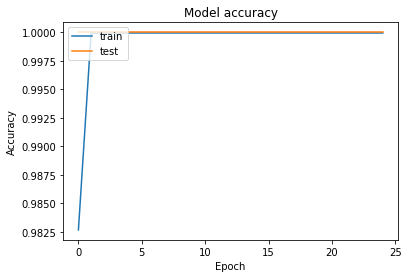

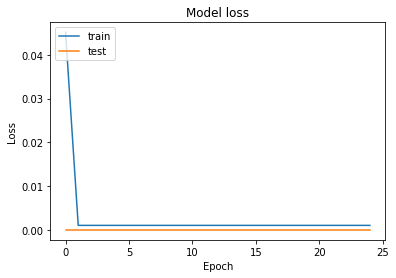


-----------------------------------------
Cluster: 1
-----------------------------------------

X_Train: (2350, 32)  Y_Train: (2350, 47)
X_Test:  (588, 32)   Y_Test:  (588, 47) 

Train on 2350 samples, validate on 588 samples
Epoch 1/25
2350/2350 [==============================] - 15s 6ms/step - loss: 0.2211 - acc: 0.9090 - val_loss: 0.1587 - val_acc: 0.9327
Epoch 2/25
2350/2350 [==============================] - 2s 807us/step - loss: 0.1518 - acc: 0.9300 - val_loss: 0.1604 - val_acc: 0.9320
Epoch 3/25
2350/2350 [==============================] - 2s 825us/step - loss: 0.1511 - acc: 0.9300 - val_loss: 0.1656 - val_acc: 0.9271
Epoch 4/25
2350/2350 [==============================] - 2s 807us/step - loss: 0.1505 - acc: 0.9316 - val_loss: 0.1632 - val_acc: 0.9354
Epoch 5/25
2350/2350 [==============================] - 2s 944us/step - loss: 0.1496 - acc: 0.9332 - val_loss: 0.1620 - val_acc: 0.9397
Epoch 6/25
2350/2350 [==============================] - 2s 914us/step - loss: 0.1475 - acc: 0.

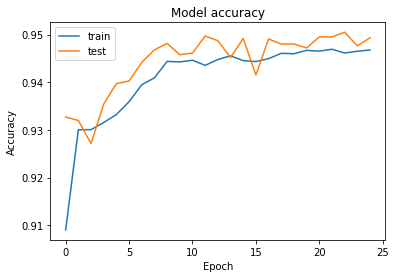

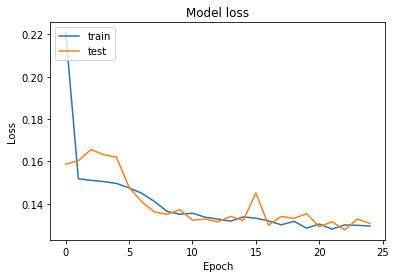


-----------------------------------------
Cluster: 2
-----------------------------------------

X_Train: (3174, 32)  Y_Train: (3174, 47)
X_Test:  (793, 32)   Y_Test:  (793, 47) 

Train on 3174 samples, validate on 793 samples
Epoch 1/25
3174/3174 [==============================] - 9s 3ms/step - loss: 0.2262 - acc: 0.9189 - val_loss: 0.1901 - val_acc: 0.9306
Epoch 2/25
3174/3174 [==============================] - 2s 761us/step - loss: 0.1816 - acc: 0.9320 - val_loss: 0.1939 - val_acc: 0.9382
Epoch 3/25
3174/3174 [==============================] - 3s 862us/step - loss: 0.1810 - acc: 0.9329 - val_loss: 0.2026 - val_acc: 0.9326
Epoch 4/25
3174/3174 [==============================] - 3s 957us/step - loss: 0.1797 - acc: 0.9333 - val_loss: 0.1974 - val_acc: 0.9382
Epoch 5/25
3174/3174 [==============================] - 3s 838us/step - loss: 0.1782 - acc: 0.9352 - val_loss: 0.1817 - val_acc: 0.9398
Epoch 6/25
3174/3174 [==============================] - 3s 831us/step - loss: 0.1721 - acc: 0.9

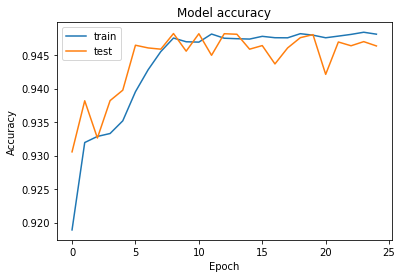

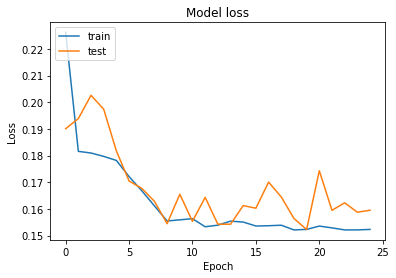


-----------------------------------------
Cluster: 3
-----------------------------------------

X_Train: (3637, 32)  Y_Train: (3637, 47)
X_Test:  (909, 32)   Y_Test:  (909, 47) 

Train on 3637 samples, validate on 909 samples
Epoch 1/25
3637/3637 [==============================] - 9s 2ms/step - loss: 0.1143 - acc: 0.9576 - val_loss: 0.0646 - val_acc: 0.9786
Epoch 2/25
3637/3637 [==============================] - 3s 819us/step - loss: 0.0716 - acc: 0.9693 - val_loss: 0.0693 - val_acc: 0.9719
Epoch 3/25
3637/3637 [==============================] - 3s 805us/step - loss: 0.0712 - acc: 0.9696 - val_loss: 0.0587 - val_acc: 0.9786
Epoch 4/25
3637/3637 [==============================] - 3s 873us/step - loss: 0.0727 - acc: 0.9687 - val_loss: 0.0648 - val_acc: 0.9719
Epoch 5/25
3637/3637 [==============================] - 3s 861us/step - loss: 0.0712 - acc: 0.9695 - val_loss: 0.0632 - val_acc: 0.9793
Epoch 6/25
3637/3637 [==============================] - 3s 960us/step - loss: 0.0708 - acc: 0.9

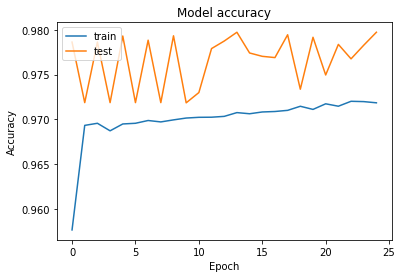

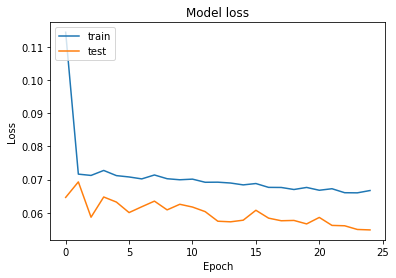


-----------------------------------------
Cluster: 4
-----------------------------------------

X_Train: (10199, 32)  Y_Train: (10199, 47)
X_Test:  (2550, 32)   Y_Test:  (2550, 47) 

Train on 10199 samples, validate on 2550 samples
Epoch 1/25
10199/10199 [==============================] - 16s 2ms/step - loss: 0.1773 - acc: 0.9467 - val_loss: 0.1561 - val_acc: 0.9564
Epoch 2/25
10199/10199 [==============================] - 9s 915us/step - loss: 0.1597 - acc: 0.9516 - val_loss: 0.1516 - val_acc: 0.9564
Epoch 3/25
10199/10199 [==============================] - 8s 818us/step - loss: 0.1572 - acc: 0.9516 - val_loss: 0.1437 - val_acc: 0.9564
Epoch 4/25
10199/10199 [==============================] - 9s 837us/step - loss: 0.1535 - acc: 0.9516 - val_loss: 0.1364 - val_acc: 0.9564
Epoch 5/25
10199/10199 [==============================] - 9s 875us/step - loss: 0.1515 - acc: 0.9516 - val_loss: 0.1354 - val_acc: 0.9564
Epoch 6/25
10199/10199 [==============================] - 9s 883us/step - loss

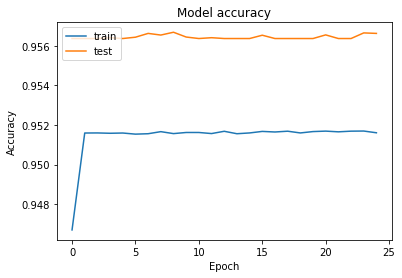

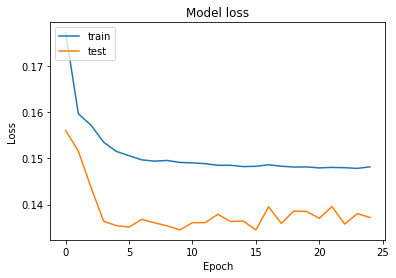


-----------------------------------------
Cluster: 5
-----------------------------------------

X_Train: (14302, 32)  Y_Train: (14302, 47)
X_Test:  (3575, 32)   Y_Test:  (3575, 47) 

Train on 14302 samples, validate on 3575 samples
Epoch 1/25
14302/14302 [==============================] - 22s 2ms/step - loss: 0.1660 - acc: 0.9465 - val_loss: 0.1385 - val_acc: 0.9559
Epoch 2/25
14302/14302 [==============================] - 16s 1ms/step - loss: 0.1373 - acc: 0.9550 - val_loss: 0.1292 - val_acc: 0.9569
Epoch 3/25
14302/14302 [==============================] - 14s 990us/step - loss: 0.1327 - acc: 0.9560 - val_loss: 0.1295 - val_acc: 0.9577
Epoch 4/25
14302/14302 [==============================] - 13s 898us/step - loss: 0.1307 - acc: 0.9565 - val_loss: 0.1259 - val_acc: 0.9581
Epoch 5/25
14302/14302 [==============================] - 16s 1ms/step - loss: 0.1300 - acc: 0.9565 - val_loss: 0.1253 - val_acc: 0.9582
Epoch 6/25
14302/14302 [==============================] - 14s 985us/step - los

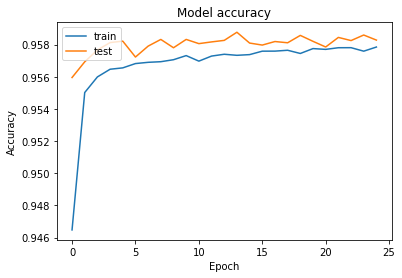

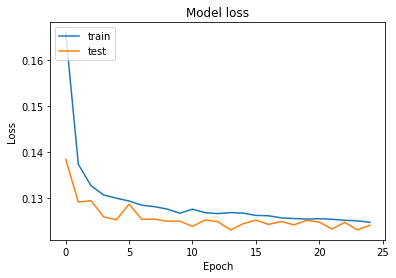


-----------------------------------------
Cluster: 6
-----------------------------------------

X_Train: (4720, 32)  Y_Train: (4720, 47)
X_Test:  (1180, 32)   Y_Test:  (1180, 47) 

Train on 4720 samples, validate on 1180 samples
Epoch 1/25
4720/4720 [==============================] - 12s 2ms/step - loss: 0.1876 - acc: 0.9355 - val_loss: 0.1669 - val_acc: 0.9465
Epoch 2/25
4720/4720 [==============================] - 5s 960us/step - loss: 0.1556 - acc: 0.9460 - val_loss: 0.1869 - val_acc: 0.9465
Epoch 3/25
4720/4720 [==============================] - 4s 906us/step - loss: 0.1563 - acc: 0.9464 - val_loss: 0.1641 - val_acc: 0.9444
Epoch 4/25
4720/4720 [==============================] - 4s 916us/step - loss: 0.1549 - acc: 0.9465 - val_loss: 0.1648 - val_acc: 0.9465
Epoch 5/25
4720/4720 [==============================] - 4s 838us/step - loss: 0.1548 - acc: 0.9467 - val_loss: 0.1633 - val_acc: 0.9497
Epoch 6/25
4720/4720 [==============================] - 4s 938us/step - loss: 0.1528 - acc:

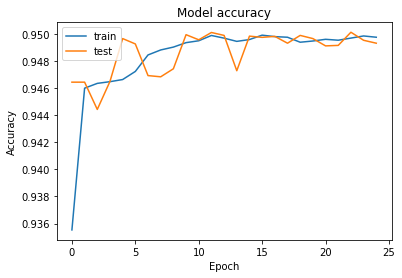

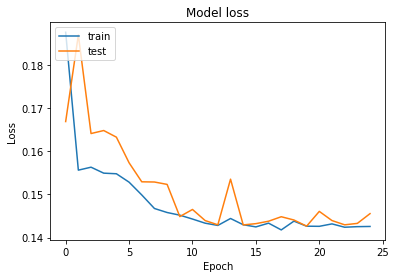

In [15]:
MLP_TRAIN_RATIO = 0.80

output_nodes = df_Y.shape[1] - 1
#print(f"Output Nodes: {output_nodes}")

for i in range(0, CLUSTER_COUNT):

  print("\n-----------------------------------------")
  print(f"Cluster: {i}")
  print("-----------------------------------------\n")

  df_X_temp = extracted_features[i].copy()
  df_Y_temp = df_Y.loc[ df_Y['clusterId'] == i ]
  train_range = round( MLP_TRAIN_RATIO * df_X_temp.shape[0] )
  
  #Training Set
  x_train = df_X_temp.iloc[:train_range,0:].values
  y_train = df_Y_temp.iloc[:train_range,0:-1].values
  print(f"X_Train: {x_train.shape}  Y_Train: {y_train.shape}")

  #Testing Set
  x_test = df_X_temp.iloc[train_range:,0:].values
  y_test = df_Y_temp.iloc[train_range:,0:-1].values
  print(f"X_Test:  {x_test.shape}   Y_Test:  {y_test.shape} \n")

  #Number of required input nodes
  input_nodes = df_X_temp.shape[1]

  #Layers
  inputs = layers.Input(shape=(input_nodes,))
  x = layers.Dense(600, activation='relu')(inputs)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(600, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(600, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(600, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(600, activation='relu')(x)
  outputs= layers.Dense(output_nodes, activation='sigmoid')(x)

  model = models.Model(inputs=inputs, outputs=outputs)

  model.compile(loss='binary_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
  
  history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=25,
                    verbose=1,
                    #shuffle = True,
                    validation_data=(x_test, y_test))
  

  #Look at first test sample
  NUMBER_OF_TEST_SAMPLES = 3
  print("\nTest Sample\n")
  
  for i in range(0, NUMBER_OF_TEST_SAMPLES):
    test_sample = np.array([x_test[i]])
    result = model.predict(test_sample)
    print(f"Real Label: {np.round(result[0]).astype(int)}")
    print(f"Prediction: {y_test[i]} \n")


  #Evaluate model
  print("\nModel Evaluation")
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  score = model.evaluate(x_train, y_train, verbose=0)
  print('Train accuracy:', score[1])

  Plot_History(history)

#Reference: https://towardsdatascience.com/multi-label-image-classification-with-neural-network-keras-ddc1ab1afede

**Explanation of change for Deep Neural Network**

For the last step we took advantage of Keras to implement a deep neural network. In comparison to Assignment 1, the use of keras allowed us to increase the number of hidden layers which were limited to 1 in the MLP classifier of the assignment. By increasing the number of hidden layers we also increased the chances of the network to recognize more patterns within the feature set. Furthermore, the small number of input features allowed us to test and trial different hyperparameters to find the most suitable network.

An additional change to the network was the addition of Drop Out layers. This allows a percentage of the nodes in a layer to be ignored when training to prevent overfitting. Our drop out rate was chosen to be an aggressive 50% to provide with the assurance that the model was not overfitting. Additionally this allowed us to better understand the clustering of our feature data. It was discovered that some of the clusters consisted of data samples with very similar labels, resulting in very high accuracies up to 99-100%. This was further confirmed when we observed models of clusters with lesser data predicting very similar outputs. 

Lastly, It was found that the best loss curves were generated by clusters containing data greater than 10,000 inputs which unfortunately were only half of the 7 clusters. This is likely due to the limited amount of reuters data available and the sparsity of the labels. If future work were to be considered, a good starting point would be to increase the amount of data through additional reuter sources or augmentation for more data equality among labels.